In [24]:
# %pip install prophet

In [25]:
import pandas as pd

# Load the data
data = """
Field	UNIQUEID-SEPAL	DATE	DAYS	OIL (stb)	GAS(scf)	WATER (stb)
RONKE	RONKE-006S:5-AB6	10/1/1992	22.5	1506	23331000	1476
RONKE	RONKE-006S:5-AB6	11/1/1992	27.5	3896	11906000	476
RONKE	RONKE-006S:5-AB6	12/1/1992	31	4192	7726000	561
RONKE	RONKE-006S:5-AB6	1/1/1993	31	4369	9823000	3360
RONKE	RONKE-006S:5-AB6	2/1/1993	28	3098	9400000	1329
RONKE	RONKE-006S:5-AB6	3/1/1993	31	3097	9413000	1328
RONKE	RONKE-006S:5-AB6	4/1/1993	29	3967	21860000	847
RONKE	RONKE-006S:5-AB6	5/1/1993	30.9	2709	17780000	1215
RONKE	RONKE-006S:5-AB6	6/1/1993	29	3065	34050000	1785
RONKE	RONKE-006S:5-AB6	7/1/1993	31	2704	28924000	1476
RONKE	RONKE-006S:5-AB6	8/1/1993	31	2570	17569000	1998
RONKE	RONKE-006S:5-AB6	9/1/1993	30	12998	14170000	9283
RONKE	RONKE-006S:5-AB6	10/1/1993	31	11987	7831000	8478
RONKE	RONKE-006S:5-AB6	11/1/1993	29.3	10196	9855000	7757
RONKE	RONKE-006S:5-AB6	12/1/1993	19.6	12435	6056000	1564
RONKE	RONKE-006S:5-AB6	1/1/1994	31	12099	14655000	8922
RONKE	RONKE-006S:5-AB6	2/1/1994	28	17284	36716000	10802
RONKE	RONKE-006S:5-AB6	3/1/1994	31	18581	32308000	779
RONKE	RONKE-006S:5-AB6	4/1/1994	30	17809	25282000	4852
RONKE	RONKE-006S:5-AB6	5/1/1994	31	4230	27551000	694
RONKE	RONKE-006S:5-AB6	6/1/1994	25.5	3197	18055000	519
RONKE	RONKE-006S:5-AB6	7/1/1994	26	3680	17052000	605
RONKE	RONKE-006S:5-AB6	9/1/1994	24.5	3458	9773000	491
RONKE	RONKE-006S:5-AB6	10/1/1994	31	4825	13308000	893
RONKE	RONKE-006S:5-AB6	11/1/1994	30	3357	7966000	5
RONKE	RONKE-006S:5-AB6	12/1/1994	31	3963	15924000	407
RONKE	RONKE-006S:5-AB6	1/1/1995	31	2781	7219000	1058
RONKE	RONKE-006S:5-AB6	2/1/1995	28	3284	5177000	84
RONKE	RONKE-006S:5-AB6	3/1/1995	31	3770	9001000	563
RONKE	RONKE-006S:5-AB6	4/1/1995	30	3792	8711000	567
RONKE	RONKE-006S:5-AB6	5/1/1995	30	4006	17190000	193
RONKE	RONKE-006S:5-AB6	6/1/1995	27.7	4195	15889000	321
RONKE	RONKE-006S:5-AB6	7/1/1995	31	5581	8672000	370
RONKE	RONKE-006S:5-AB6	8/1/1995	30.7	3660	17641000	1299
RONKE	RONKE-006S:5-AB6	9/1/1995	30	3743	17207000	1329
RONKE	RONKE-006S:5-AB6	10/1/1995	31	3127	12606000	1451
RONKE	RONKE-006S:5-AB6	11/1/1995	30	3098	5737000	1554
RONKE	RONKE-006S:5-AB6	12/1/1995	31	3928	17267000	422
RONKE	RONKE-006S:5-AB6	1/1/1996	31	2958	5859000	1179
RONKE	RONKE-006S:5-AB6	2/1/1996	29	2897	5499000	945
RONKE	RONKE-006S:5-AB6	3/1/1996	29.8	3110	5688000	164
RONKE	RONKE-006S:5-AB6	4/1/1996	30	2896	22596000	272
RONKE	RONKE-006S:5-AB6	5/1/1996	31	2896	22596000	272
RONKE	RONKE-006S:5-AB6	6/1/1996	30	3094	11254000	201
RONKE	RONKE-006S:5-AB6	7/1/1996	31	3432	43459000	212
RONKE	RONKE-006S:5-AB6	8/1/1996	31	3719	4614000	345
RONKE	RONKE-006S:5-AB6	9/1/1996	23.3	2474	11221000	658
RONKE	RONKE-006S:5-AB6	10/1/1996	31	3679	18378000	1001
RONKE	RONKE-006S:5-AB6	11/1/1996	30	3679	18378000	1001
RONKE	RONKE-006S:5-AB6	12/1/1996	31	3679	18378000	1001
RONKE	RONKE-006S:5-AB6	1/1/1997	31	2767	15702000	1314
RONKE	RONKE-006S:5-AB6	2/1/1997	27.4	2508	19904000	1164
RONKE	RONKE-006S:5-AB6	3/1/1997	28.8	2617	28422000	1243
RONKE	RONKE-006S:5-AB6	4/1/1997	30	3458	12337000	1808
RONKE	RONKE-006S:5-AB6	5/1/1997	31	2808	12296000	1318
RONKE	RONKE-006S:5-AB6	6/1/1997	30	4725	11656000	162
RONKE	RONKE-006S:5-AB6	7/1/1997	31	5548	10854000	73
RONKE	RONKE-006S:5-AB6	8/1/1997	28.6	2324	565000	309
RONKE	RONKE-006S:5-AB6	9/1/1997	30	3228	2488000	43
RONKE	RONKE-006S:5-AB6	10/1/1997	22	1582	5316000	507
RONKE	RONKE-006S:5-AB6	11/1/1997	5	420	9059000	123
RONKE	RONKE-006S:5-AB6	12/1/1997	14.7	8503	5752000	0
RONKE	RONKE-006S:5-AB6	1/1/1998	31	9766	10442000	0
RONKE	RONKE-006S:5-AB6	2/1/1998	1.9	162	11256000	2
RONKE	RONKE-006S:5-AB6	3/1/1998	31	2205	22671000	308
RONKE	RONKE-006S:5-AB6	4/1/1998	30	1675	4934000	1143
RONKE	RONKE-006S:5-AB6	5/1/1998	27.7	1734	9543000	1120
RONKE	RONKE-006S:5-AB6	6/1/1998	30	2138	10149000	808
RONKE	RONKE-006S:5-AB6	7/1/1998	30.9	2398	10132000	481
RONKE	RONKE-006S:5-AB6	8/1/1998	28.8	2713	1676000	30
RONKE	RONKE-006S:5-AB6	9/1/1998	30	3256	4969000	6
RONKE	RONKE-006S:5-AB6	10/1/1998	28	2060	9582000	696
RONKE	RONKE-006S:5-AB6	11/1/1998	21.9	1799	4422000	266
RONKE	RONKE-006S:5-AB6	12/1/1998	28.9	2428	5468000	389
RONKE	RONKE-006S:5-AB6	1/1/1999	30.9	2696	8909000	445
RONKE	RONKE-006S:5-AB6	2/1/1999	27.5	2320	1663000	519
RONKE	RONKE-006S:5-AB6	3/1/1999	27.3	2510	2732000	220
RONKE	RONKE-006S:5-AB6	4/1/1999	24	2059	1987000	351
RONKE	RONKE-006S:5-AB6	5/1/1999	29.3	2243	2013000	360
RONKE	RONKE-006S:5-AB6	6/1/1999	18.3	1549	1085000	249
RONKE	RONKE-006S:5-AB6	7/1/1999	30.7	2767	1376000	445
RONKE	RONKE-006S:5-AB6	8/1/1999	30.7	2526	1651000	388
RONKE	RONKE-006S:5-AB6	9/1/1999	14.1	1147	753000	50
RONKE	RONKE-006S:5-AB6	10/1/1999	22	1582	5316000	507
RONKE	RONKE-006S:5-AB6	11/1/1999	5	420	9059000	123
RONKE	RONKE-006S:5-AB6	12/1/1999	14.7	8503	5752000	0
"""

# Convert the data into a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data), sep='\t')

# Filter data for the specific well
well_data = df[df['UNIQUEID-SEPAL'] == 'RONKE-006S:5-AB6']

# Convert DATE to datetime format
well_data['DATE'] = pd.to_datetime(well_data['DATE'])

# Select only the DATE and OIL (stb) columns for Prophet
well_data = well_data[['DATE', 'OIL (stb)']]

# Rename columns for Prophet (ds: date, y: target variable)
well_data = well_data.rename(columns={'DATE': 'ds', 'OIL (stb)': 'y'})

print(well_data.head())

          ds     y
0 1992-10-01  1506
1 1992-11-01  3896
2 1992-12-01  4192
3 1993-01-01  4369
4 1993-02-01  3098


In [26]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model on the data
model.fit(well_data)

# Create a future dataframe for forecasting (e.g., 365 days into the future)
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# View the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

19:25:20 - cmdstanpy - INFO - Chain [1] start processing
19:25:21 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat   yhat_lower    yhat_upper
446 2000-11-26  12951.799889  8835.637807  17202.015771
447 2000-11-27  11246.580801  7240.472999  15176.756609
448 2000-11-28   9272.469197  4621.166406  13251.260611
449 2000-11-29   7049.357456  3320.283173  10946.859060
450 2000-11-30   4603.147281   360.645816   8581.670294


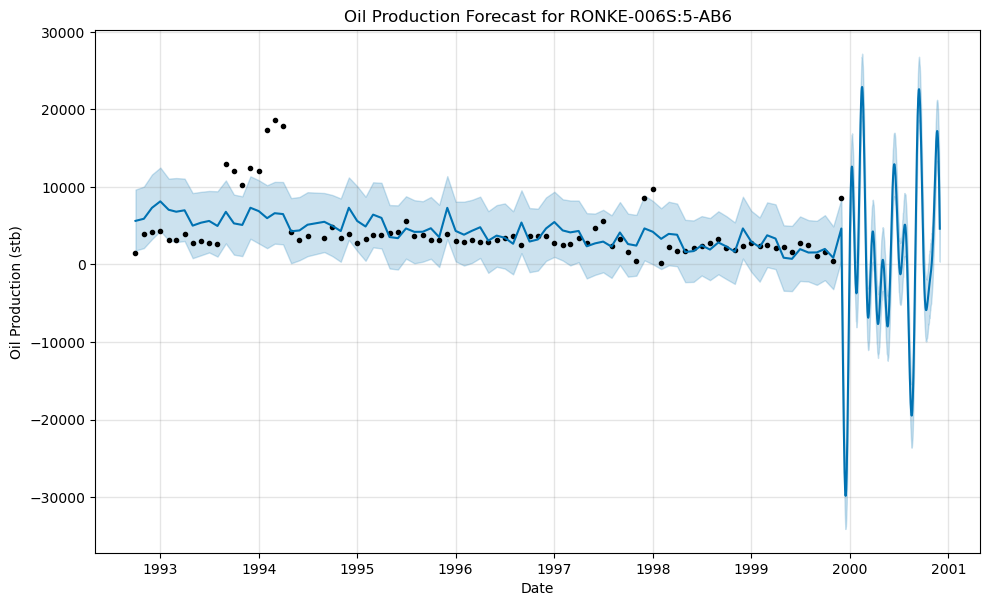

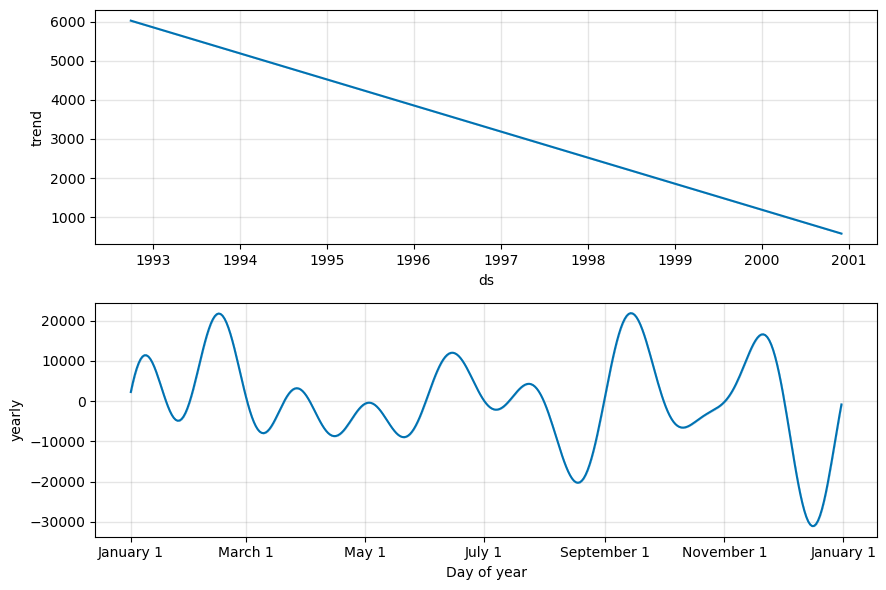

In [27]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast)
plt.title('Oil Production Forecast for RONKE-006S:5-AB6')
plt.xlabel('Date')
plt.ylabel('Oil Production (stb)')
plt.show()

# Plot forecast components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error

# Calculate MAPE
y_true = well_data['y']
y_pred = forecast.loc[:len(y_true)-1, 'yhat']
mape = mean_absolute_error(y_true, y_pred) / y_true.mean() * 100

print(f'MAPE: {mape:.2f}%')

MAPE: 51.01%


In [29]:
#### ANother code

In [30]:
# pip install pandas prophet matplotlib scikit-learn

In [31]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Convert the data into a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data), sep='\t')

# Filter data for the specific well
well_data = df[df['UNIQUEID-SEPAL'] == 'RONKE-006S:5-AB6']

# Convert DATE to datetime format
well_data['DATE'] = pd.to_datetime(well_data['DATE'])

# Select relevant columns
well_data = well_data[['DATE', 'OIL (stb)', 'GAS(scf)', 'WATER (stb)']]

# Rename columns for Prophet
well_data = well_data.rename(columns={'DATE': 'ds', 'OIL (stb)': 'y', 'GAS(scf)': 'gas', 'WATER (stb)': 'water'})

print(well_data.head())

          ds     y       gas  water
0 1992-10-01  1506  23331000   1476
1 1992-11-01  3896  11906000    476
2 1992-12-01  4192   7726000    561
3 1993-01-01  4369   9823000   3360
4 1993-02-01  3098   9400000   1329


In [32]:
# Initialize the Prophet model
model = Prophet()

# Add additional regressors
model.add_regressor('gas')
model.add_regressor('water')

# Fit the model on the data
model.fit(well_data)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=365)

# Add additional regressors to the future dataframe
future['gas'] = well_data['gas'].mean()  # Use mean gas production for future predictions
future['water'] = well_data['water'].mean()  # Use mean water production for future predictions

# Make predictions
forecast = model.predict(future)

# View the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

19:25:22 - cmdstanpy - INFO - Chain [1] start processing
19:25:24 - cmdstanpy - INFO - Chain [1] done processing


            ds         yhat   yhat_lower    yhat_upper
446 2000-11-26  9152.488348  6070.392706  12235.986386
447 2000-11-27  8601.498731  5754.908998  11748.170171
448 2000-11-28  8030.379991  4880.160888  10943.852096
449 2000-11-29  7442.649621  4337.387663  10477.161289
450 2000-11-30  6841.673949  3757.664264   9981.570235


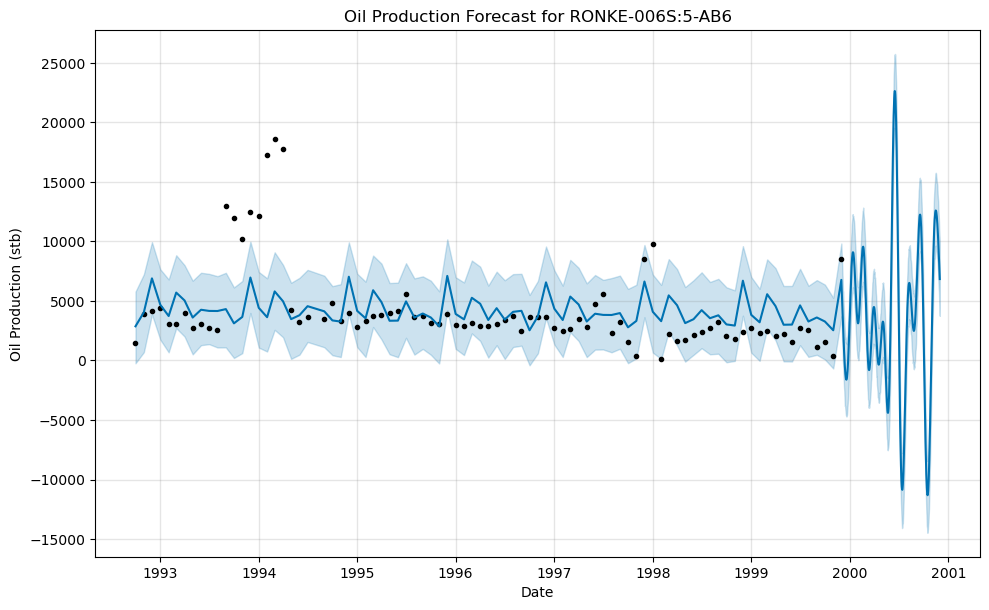

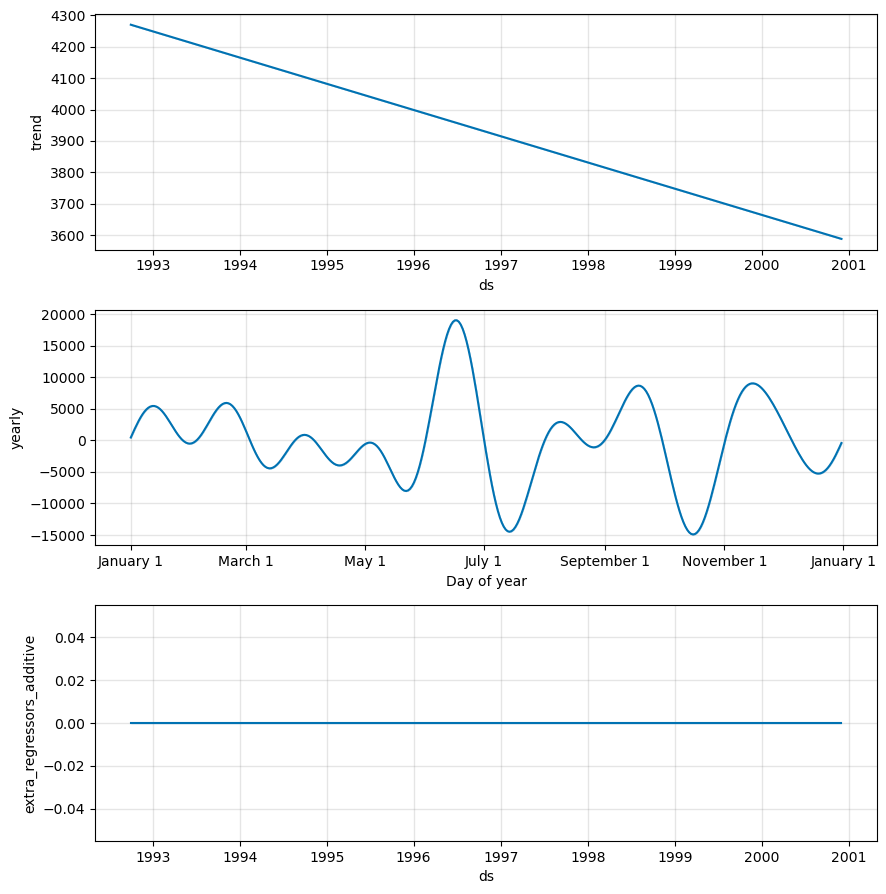

In [33]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Oil Production Forecast for RONKE-006S:5-AB6')
plt.xlabel('Date')
plt.ylabel('Oil Production (stb)')
plt.show()

# Plot forecast components (trend, seasonality, and regressors)
fig2 = model.plot_components(forecast)
plt.show()

19:25:27 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] done processing


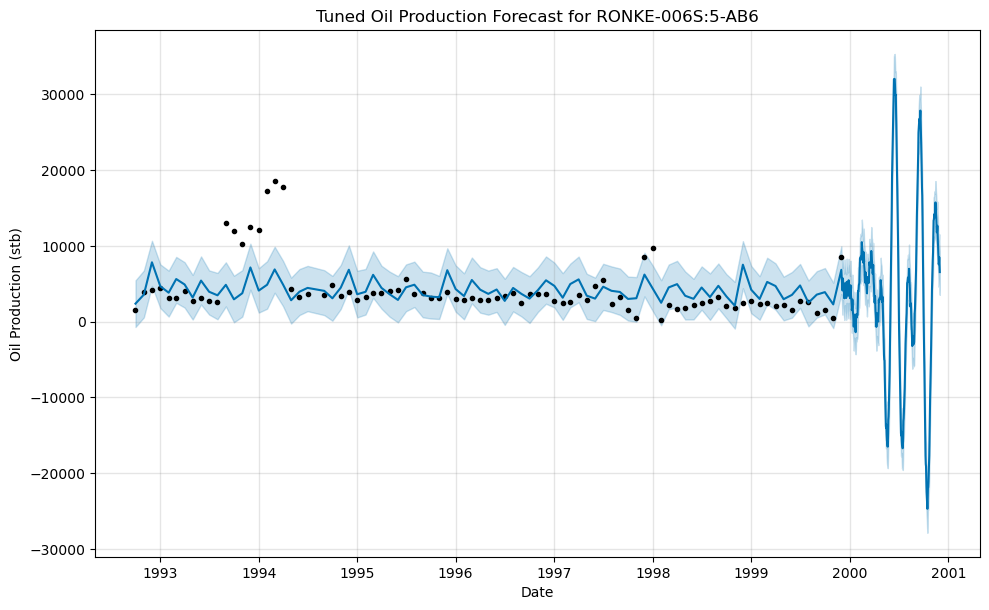

In [34]:
# Initialize the Prophet model with tuned hyperparameters
tuned_model = Prophet(
    changepoint_prior_scale=0.05,  # Controls flexibility of trend changes
    seasonality_prior_scale=10.0,  # Controls strength of seasonality
    holidays_prior_scale=10.0,     # Controls impact of holidays
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False
)

# Add additional regressors
tuned_model.add_regressor('gas')
tuned_model.add_regressor('water')

# Fit the model on the data
tuned_model.fit(well_data)

# Make predictions
tuned_forecast = tuned_model.predict(future)

# Plot the tuned forecast
fig = tuned_model.plot(tuned_forecast)
plt.title('Tuned Oil Production Forecast for RONKE-006S:5-AB6')
plt.xlabel('Date')
plt.ylabel('Oil Production (stb)')
plt.show()

In [35]:
# Calculate MAPE for the tuned model
y_true = well_data['y']
y_pred = tuned_forecast.loc[:len(y_true)-1, 'yhat']
mape = mean_absolute_error(y_true, y_pred) / y_true.mean() * 100

print(f'MAPE: {mape:.2f}%')

MAPE: 51.99%


In [36]:
#### DCA

In [37]:
# pip install pandas numpy matplotlib scipy

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Convert the data into a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data), sep='\t')

# Filter data for the specific well
well_data = df[df['UNIQUEID-SEPAL'] == 'RONKE-006S:5-AB6']

# Convert DATE to datetime format
well_data['DATE'] = pd.to_datetime(well_data['DATE'])

# Select relevant columns
well_data = well_data[['DATE', 'OIL (stb)']]

# Rename columns
well_data = well_data.rename(columns={'DATE': 'ds', 'OIL (stb)': 'y'})

# Add a time index (in days) for DCA
well_data['time'] = (well_data['ds'] - well_data['ds'].min()).dt.days

print(well_data.head())

          ds     y  time
0 1992-10-01  1506     0
1 1992-11-01  3896    31
2 1992-12-01  4192    61
3 1993-01-01  4369    92
4 1993-02-01  3098   123


In [39]:
df

,Field,UNIQUEID-SEPAL,DATE,DAYS,OIL (stb),GAS(scf),WATER (stb)
0,RONKE,RONKE-006S:5-AB6,10/1/1992,22.5,1506,23331000,1476
1,RONKE,RONKE-006S:5-AB6,11/1/1992,27.5,3896,11906000,476
2,RONKE,RONKE-006S:5-AB6,12/1/1992,31.0,4192,7726000,561
3,RONKE,RONKE-006S:5-AB6,1/1/1993,31.0,4369,9823000,3360
4,RONKE,RONKE-006S:5-AB6,2/1/1993,28.0,3098,9400000,1329
...,...,...,...,...,...,...,...
81,RONKE,RONKE-006S:5-AB6,8/1/1999,30.7,2526,1651000,388
82,RONKE,RONKE-006S:5-AB6,9/1/1999,14.1,1147,753000,50
83,RONKE,RONKE-006S:5-AB6,10/1/1999,22.0,1582,5316000,507
84,RONKE,RONKE-006S:5-AB6,11/1/1999,5.0,420,9059000,123


In [40]:
# Define the exponential decline function
def exponential_decline(t, qi, D):
    return qi * np.exp(-D * t)

# Fit the exponential decline curve to the data
params, _ = curve_fit(exponential_decline, well_data['time'], well_data['y'], p0=[well_data['y'].max(), 0.001])

# Extract the fitted parameters
qi, D = params
print(f"Initial production rate (qi): {qi:.2f} stb/day")
print(f"Decline rate (D): {D:.6f} /day")

# Generate predictions using the fitted model
well_data['y_pred_dca'] = exponential_decline(well_data['time'], qi, D)

# Calculate MAPE for DCA
mape_dca = mean_absolute_error(well_data['y'], well_data['y_pred_dca']) / well_data['y'].mean() * 100
print(f'DCA MAPE: {mape_dca:.2f}%')

Initial production rate (qi): 6957.52 stb/day
Decline rate (D): 0.000418 /day
DCA MAPE: 50.40%


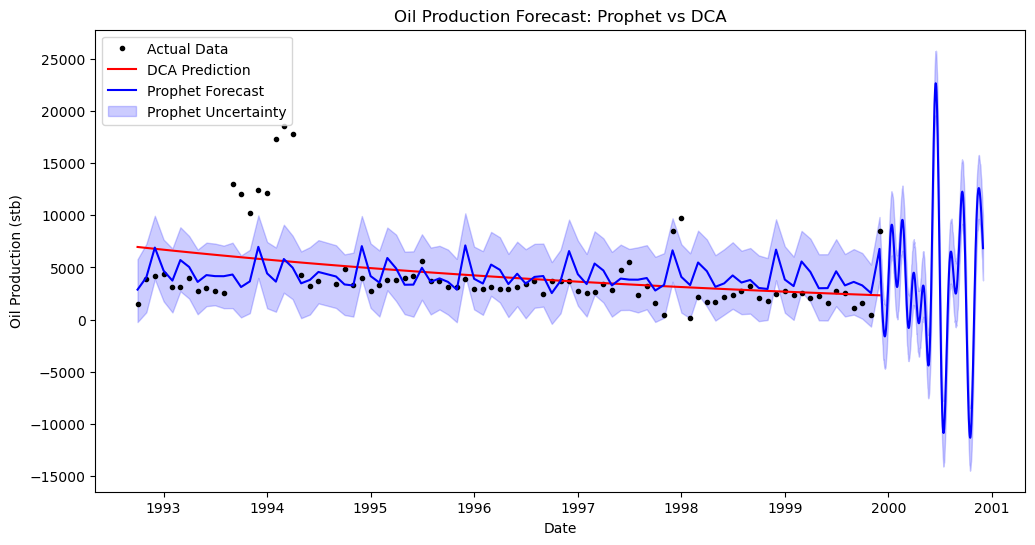

In [41]:
# Plot the actual data, Prophet forecast, and DCA predictions
plt.figure(figsize=(12, 6))
plt.plot(well_data['ds'], well_data['y'], 'k.', label='Actual Data')
plt.plot(well_data['ds'], well_data['y_pred_dca'], 'r-', label='DCA Prediction')
plt.plot(forecast['ds'], forecast['yhat'], 'b-', label='Prophet Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Prophet Uncertainty')
plt.title('Oil Production Forecast: Prophet vs DCA')
plt.xlabel('Date')
plt.ylabel('Oil Production (stb)')
plt.legend()
plt.show()

In [42]:
# Calculate MAPE for Prophet
y_true = well_data['y']
y_pred_prophet = forecast.loc[:len(y_true)-1, 'yhat']
mape_prophet = mean_absolute_error(y_true, y_pred_prophet) / y_true.mean() * 100

print(f'Prophet MAPE: {mape_prophet:.2f}%')
print(f'DCA MAPE: {mape_dca:.2f}%')

Prophet MAPE: 52.00%
DCA MAPE: 50.40%


In [43]:
# Modelling Using Deep Neural Network

# pip install pandas numpy matplotlib tensorflow scikit-learn

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Convert the data into a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data), sep='\t')

# Filter data for the specific well
well_data = df[df['UNIQUEID-SEPAL'] == 'RONKE-006S:5-AB6']

# Convert DATE to datetime and set as index
well_data['DATE'] = pd.to_datetime(well_data['DATE'])
well_data.set_index('DATE', inplace=True)

# Select features and target
features = ['OIL (stb)', 'GAS(scf)', 'WATER (stb)']
data = well_data[features]

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split into training and testing sets (80-20 split)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences for LSTM
def create_sequences(data, window_size=12):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size, :])
        y.append(data[i+window_size, 0])  # Predict oil production (column 0)
    return np.array(X), np.array(y)

window_size = 12  # Use 12 months of history to predict the next month
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (56, 12, 3)
Testing data shape: (6, 12, 3)


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.3415 - val_loss: 0.1243
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.2077 - val_loss: 0.1044
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.1432 - val_loss: 0.1534
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 0.1499 - val_loss: 0.1663
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 0.1563 - val_loss: 0.1559
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 0.1580 - val_loss: 0.1368
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 0.1250 - val_loss: 0.1163
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 0.1114 - val_loss: 0.1023
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.1216 - val_loss: 0.0978
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 0.1429 - val_loss: 0.0985
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - loss: 0.1304 - val_loss: 0.1030
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 0.1209

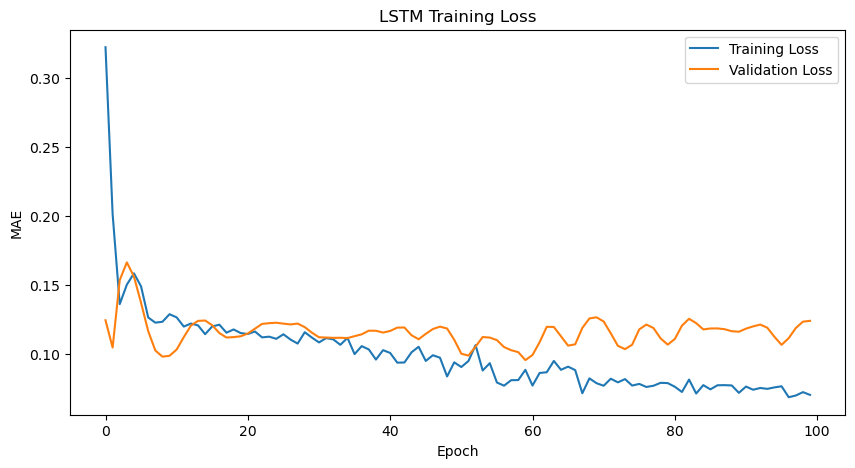

In [45]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer (oil production)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [46]:
# Generate predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions to original scale
def inverse_scale_predictions(scaled_predictions, scaler, feature_index=0):
    dummy_data = np.zeros((len(scaled_predictions), scaled_data.shape[1]))
    dummy_data[:, feature_index] = scaled_predictions.flatten()
    return scaler.inverse_transform(dummy_data)[:, feature_index]

y_train_actual = scaler.inverse_transform(train_data)[window_size:, 0]
y_train_pred = inverse_scale_predictions(train_predict, scaler, 0)
y_test_actual = scaler.inverse_transform(test_data)[window_size:, 0]
y_test_pred = inverse_scale_predictions(test_predict, scaler, 0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


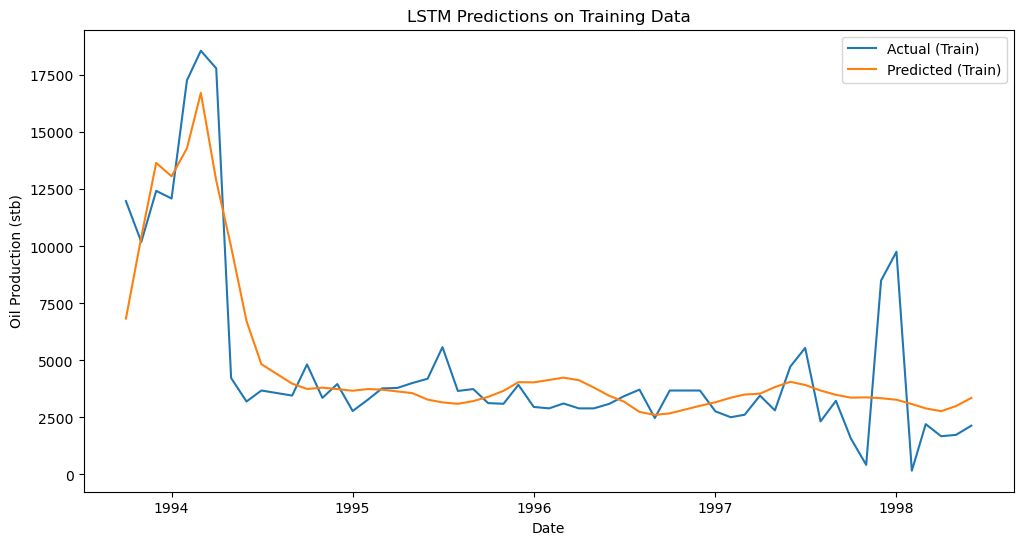

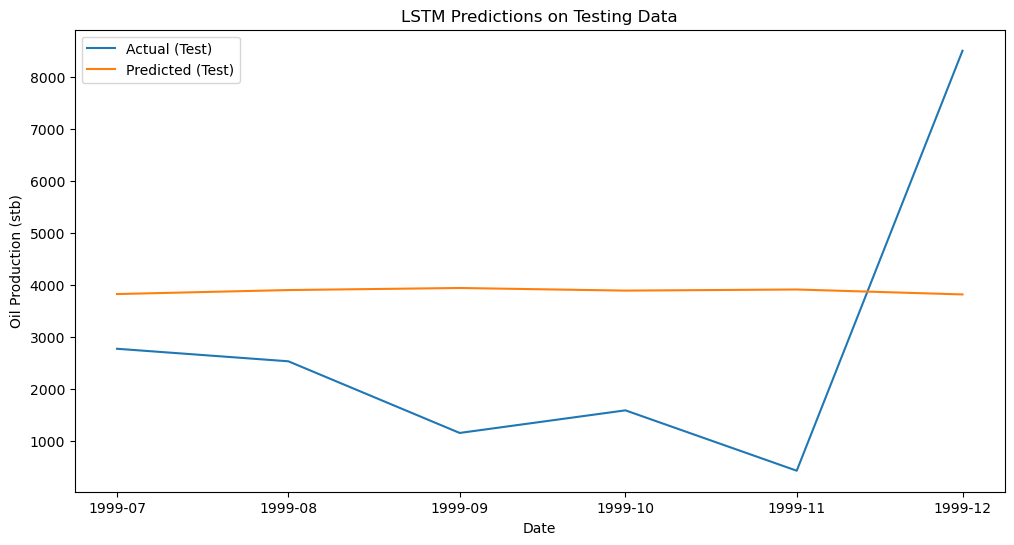

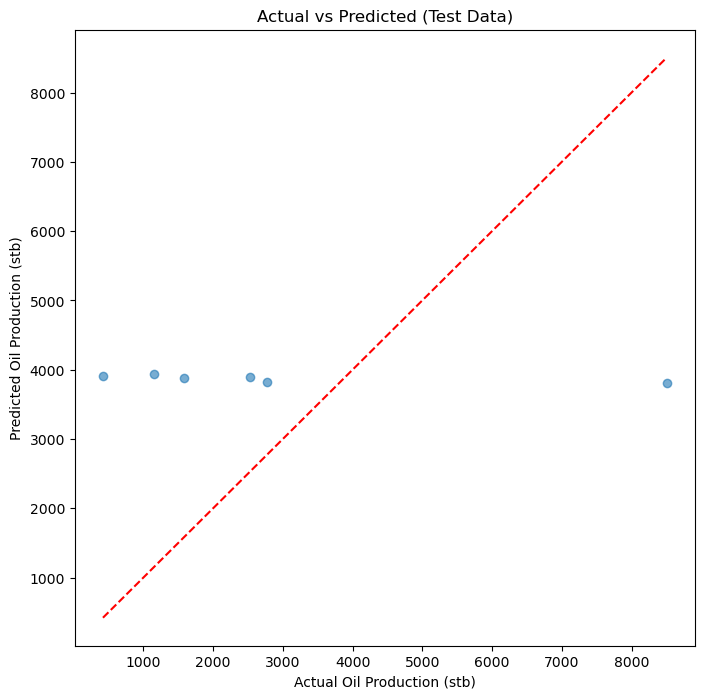

In [48]:
# Plot training predictions
plt.figure(figsize=(12, 6))
plt.plot(well_data.index[window_size:train_size], y_train_actual, label='Actual (Train)')
plt.plot(well_data.index[window_size:train_size], y_train_pred, label='Predicted (Train)')
plt.title('LSTM Predictions on Training Data')
plt.xlabel('Date')
plt.ylabel('Oil Production (stb)')
plt.legend()
plt.show()

# Plot testing predictions
plt.figure(figsize=(12, 6))
plt.plot(well_data.index[train_size+window_size:], y_test_actual, label='Actual (Test)')
plt.plot(well_data.index[train_size+window_size:], y_test_pred, label='Predicted (Test)')
plt.title('LSTM Predictions on Testing Data')
plt.xlabel('Date')
plt.ylabel('Oil Production (stb)')
plt.legend()
plt.show()

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, y_test_pred, alpha=0.6)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], 'r--')
plt.xlabel('Actual Oil Production (stb)')
plt.ylabel('Predicted Oil Production (stb)')
plt.title('Actual vs Predicted (Test Data)')
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Calculate metrics for test data
mae_lstm = mean_absolute_error(y_test_actual, y_test_pred)
mape_lstm = mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100

print(f'LSTM Test MAE: {mae_lstm:.2f}')
print(f'LSTM Test MAPE: {mape_lstm:.2f}%')

LSTM Test MAE: 2616.05
LSTM Test MAPE: 227.80%
